![Breast-cancer-detection-and-classification-using-the-proposed-method.png](attachment:Breast-cancer-detection-and-classification-using-the-proposed-method.png)

# Breast Cancer Classification System with Neural Network

#

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('/content/breast_cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [12]:
X = df
y = df['label']

In [13]:
X = df.drop(columns=['label'])
print(X.shape)



(569, 30)


In [14]:
# Check for missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])  # 0: Benign, 1: Malignant

y = df['label']

In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

Training model with batch size: 16
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.6956 - loss: 0.6844 - val_accuracy: 0.8947 - val_loss: 0.4007
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8841 - loss: 0.3804 - val_accuracy: 0.9035 - val_loss: 0.2852
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9375 - loss: 0.2946 - val_accuracy: 0.9123 - val_loss: 0.2197
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9599 - loss: 0.2231 - val_accuracy: 0.9298 - val_loss: 0.1806
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9549 - loss: 0.1849 - val_accuracy: 0.9386 - val_loss: 0.1613
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9532 - loss: 0.1589 - val_accuracy: 0.9386 - val_loss: 0.1411
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9634 - loss: 0.1284 - val_accuracy: 0.9298 - val_loss: 0.1260
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9840 - loss: 0.081

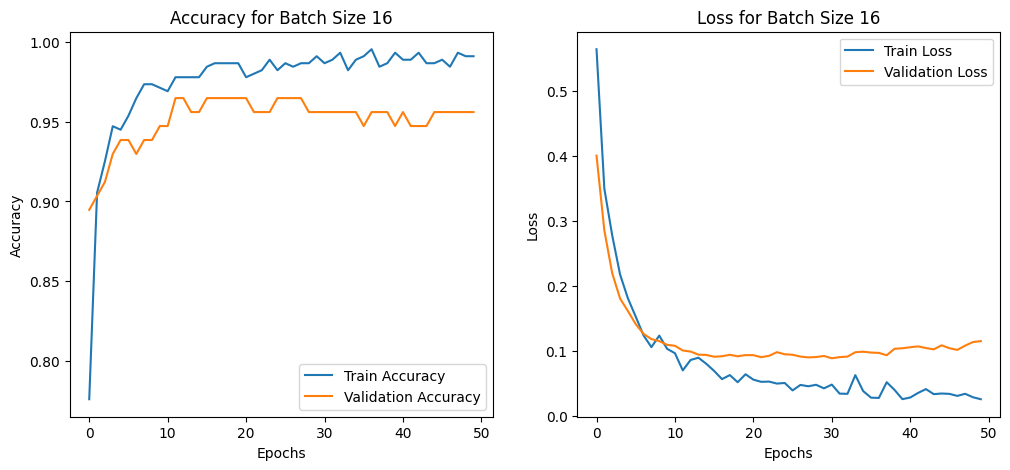

Training model with batch size: 32
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.5864 - loss: 0.8012 - val_accuracy: 0.7719 - val_loss: 0.5159
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8192 - loss: 0.5125 - val_accuracy: 0.9035 - val_loss: 0.3966
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8623 - loss: 0.4070 - val_accuracy: 0.9035 - val_loss: 0.3247
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8929 - loss: 0.3714 - val_accuracy: 0.9123 - val_loss: 0.2736
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9101 - loss: 0.3157 - val_accuracy: 0.9211 - val_loss: 0.2362
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9312 - loss: 0.2398 - val_accuracy: 0.9211 - val_loss: 0.2046
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9367 - loss: 0.2438 - val_accuracy: 0.9474 - val_loss: 0.1817
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9529 - loss: 0.20

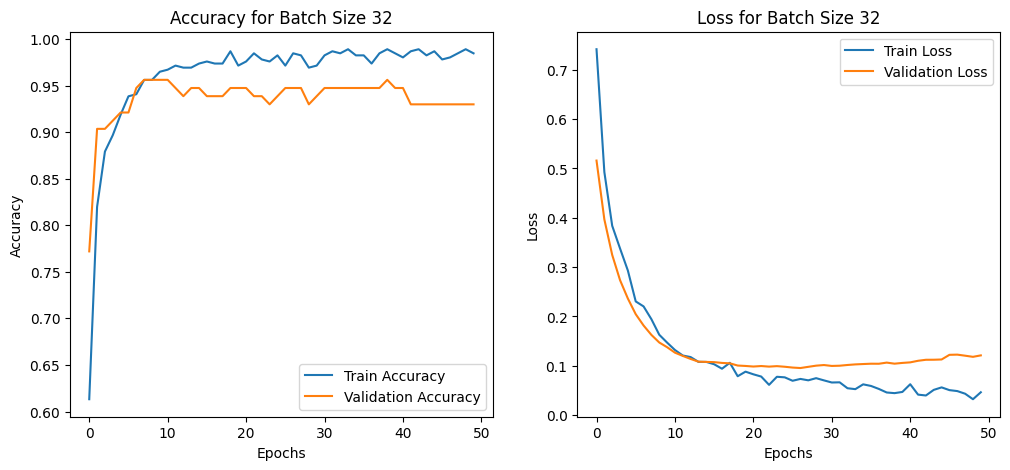

Training model with batch size: 64
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step - accuracy: 0.3870 - loss: 0.8228 - val_accuracy: 0.5263 - val_loss: 0.6802
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4969 - loss: 0.6853 - val_accuracy: 0.7544 - val_loss: 0.5901
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7070 - loss: 0.5921 - val_accuracy: 0.8421 - val_loss: 0.5173
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7689 - loss: 0.5239 - val_accuracy: 0.8684 - val_loss: 0.4602
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7816 - loss: 0.4643 - val_accuracy: 0.8860 - val_loss: 0.4123
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8665 - loss: 0.4311 - val_accuracy: 0.8860 - val_loss: 0.3730
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8683 - loss: 0.3920 - val_accuracy: 0.8947 - val_loss: 0.3388
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8930 - loss: 0.3657 - val_

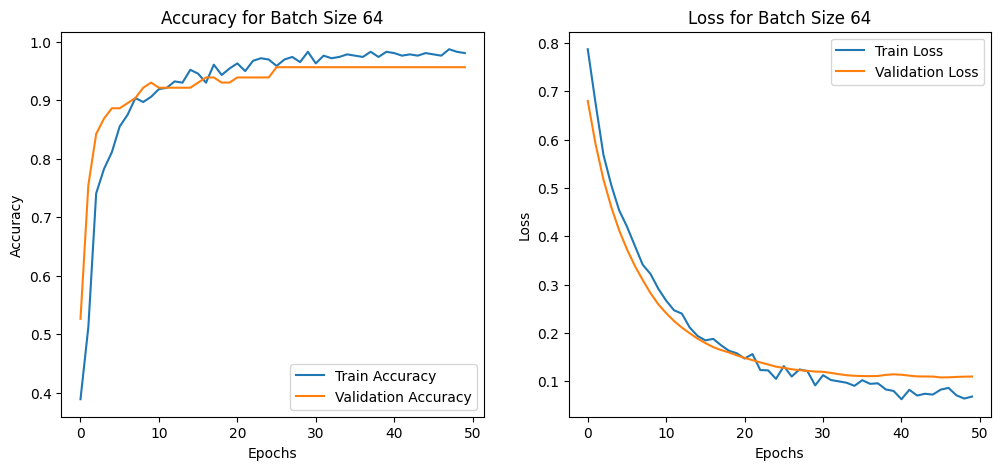

Final Accuracy Results:
Batch Size 16: 95.61%
Batch Size 32: 92.98%
Batch Size 64: 95.61%


In [17]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Define batch sizes for looping
batch_sizes = [16, 32, 64]

# Store results
results = {}

for batch_size in batch_sizes:
    print(f"Training model with batch size: {batch_size}")

    # Build the neural network model
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50, batch_size=batch_size,
        class_weight=class_weights_dict,
        verbose=1
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test Accuracy for batch size {batch_size}: {accuracy * 100:.2f}%')
    results[batch_size] = accuracy

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy for Batch Size {batch_size}')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss for Batch Size {batch_size}')
    plt.show()

    # Save the model for each batch size
    model.save(f"breast_cancer_nn_model_batch_{batch_size}.h5")

# Display final results
print("Final Accuracy Results:")
for batch, acc in results.items():
    print(f"Batch Size {batch}: {acc * 100:.2f}%")

